In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
from tensorflow.keras.models import load_model, Model
import numpy as np

print("TensorFlow version is: {}".format(tf.__version__))
print("Eager execution is: {}".format(tf.executing_eagerly()))
print("Keras version is: {}".format(tf.keras.__version__))

TensorFlow version is: 2.9.1
Eager execution is: True
Keras version is: 2.9.0


In [2]:
site_od_detector = load_model('checkpoints/Site_OD_Output.h5')

2022-12-09 16:24:03.831151: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
site_od_detector.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 448, 448, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 448, 448, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 448, 448, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 224, 224, 64  0          ['tf.math.multiply_3[0][0]',     
 da)                            )                                 'tf.math.multiply_5[0][0]']     
                                                                                                  
 conv2d_6 (Conv2D)              (None, 224, 224, 64  4096        ['tf.__operators__.add[0][0]']   
                                )                                                                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 224, 224, 64  4096        ['tf.math.multiply_1[0][0]']     
                                )                                                                 
                                                                                                  
 batch_nor

 a)                             )                                 'tf.math.tanh_10[0][0]']        
                                                                                                  
 conv2d_11 (Conv2D)             (None, 112, 112, 64  4096        ['tf.math.multiply_10[0][0]']    
                                )                                                                 
                                                                                                  
 batch_normalization_11 (BatchN  (None, 112, 112, 64  256        ['conv2d_11[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 tf.math.softplus_11 (TFOpLambd  (None, 112, 112, 64  0          ['batch_normalization_11[0][0]'] 
 a)                             )                                                                 
          

 tf.math.softplus_9 (TFOpLambda  (None, 112, 112, 64  0          ['batch_normalization_9[0][0]']  
 )                              )                                                                 
                                                                                                  
 tf.math.tanh_15 (TFOpLambda)   (None, 112, 112, 64  0           ['tf.math.softplus_15[0][0]']    
                                )                                                                 
                                                                                                  
 tf.math.tanh_9 (TFOpLambda)    (None, 112, 112, 64  0           ['tf.math.softplus_9[0][0]']     
                                )                                                                 
                                                                                                  
 tf.math.multiply_15 (TFOpLambd  (None, 112, 112, 64  0          ['batch_normalization_15[0][0]', 
 a)       

 tf.math.tanh_21 (TFOpLambda)   (None, 56, 56, 128)  0           ['tf.math.softplus_21[0][0]']    
                                                                                                  
 tf.math.multiply_21 (TFOpLambd  (None, 56, 56, 128)  0          ['batch_normalization_21[0][0]', 
 a)                                                               'tf.math.tanh_21[0][0]']        
                                                                                                  
 tf.__operators__.add_3 (TFOpLa  (None, 56, 56, 128)  0          ['tf.math.multiply_19[0][0]',    
 mbda)                                                            'tf.math.multiply_21[0][0]']    
                                                                                                  
 conv2d_22 (Conv2D)             (None, 56, 56, 128)  16384       ['tf.__operators__.add_3[0][0]'] 
                                                                                                  
 batch_nor

                                                                                                  
 tf.math.softplus_27 (TFOpLambd  (None, 56, 56, 128)  0          ['batch_normalization_27[0][0]'] 
 a)                                                                                               
                                                                                                  
 tf.math.tanh_27 (TFOpLambda)   (None, 56, 56, 128)  0           ['tf.math.softplus_27[0][0]']    
                                                                                                  
 tf.math.multiply_27 (TFOpLambd  (None, 56, 56, 128)  0          ['batch_normalization_27[0][0]', 
 a)                                                               'tf.math.tanh_27[0][0]']        
                                                                                                  
 tf.__operators__.add_6 (TFOpLa  (None, 56, 56, 128)  0          ['tf.__operators__.add_5[0][0]', 
 mbda)    

 conv2d_33 (Conv2D)             (None, 56, 56, 128)  147456      ['tf.math.multiply_32[0][0]']    
                                                                                                  
 batch_normalization_33 (BatchN  (None, 56, 56, 128)  512        ['conv2d_33[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 tf.math.softplus_33 (TFOpLambd  (None, 56, 56, 128)  0          ['batch_normalization_33[0][0]'] 
 a)                                                                                               
                                                                                                  
 tf.math.tanh_33 (TFOpLambda)   (None, 56, 56, 128)  0           ['tf.math.softplus_33[0][0]']    
                                                                                                  
 tf.math.m

                                                                                                  
 tf.math.multiply_37 (TFOpLambd  (None, 56, 56, 256)  0          ['batch_normalization_37[0][0]', 
 a)                                                               'tf.math.tanh_37[0][0]']        
                                                                                                  
 zero_padding2d_3 (ZeroPadding2  (None, 57, 57, 256)  0          ['tf.math.multiply_37[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2d_38 (Conv2D)             (None, 28, 28, 512)  1179648     ['zero_padding2d_3[0][0]']       
                                                                                                  
 batch_normalization_38 (BatchN  (None, 28, 28, 512)  2048       ['conv2d_38[0][0]']              
 ormalizat

 tf.math.tanh_44 (TFOpLambda)   (None, 28, 28, 256)  0           ['tf.math.softplus_44[0][0]']    
                                                                                                  
 tf.math.multiply_44 (TFOpLambd  (None, 28, 28, 256)  0          ['batch_normalization_44[0][0]', 
 a)                                                               'tf.math.tanh_44[0][0]']        
                                                                                                  
 tf.__operators__.add_12 (TFOpL  (None, 28, 28, 256)  0          ['tf.__operators__.add_11[0][0]',
 ambda)                                                           'tf.math.multiply_44[0][0]']    
                                                                                                  
 conv2d_45 (Conv2D)             (None, 28, 28, 256)  65536       ['tf.__operators__.add_12[0][0]']
                                                                                                  
 batch_nor

                                                                                                  
 tf.math.softplus_50 (TFOpLambd  (None, 28, 28, 256)  0          ['batch_normalization_50[0][0]'] 
 a)                                                                                               
                                                                                                  
 tf.math.tanh_50 (TFOpLambda)   (None, 28, 28, 256)  0           ['tf.math.softplus_50[0][0]']    
                                                                                                  
 tf.math.multiply_50 (TFOpLambd  (None, 28, 28, 256)  0          ['batch_normalization_50[0][0]', 
 a)                                                               'tf.math.tanh_50[0][0]']        
                                                                                                  
 tf.__operators__.add_15 (TFOpL  (None, 28, 28, 256)  0          ['tf.__operators__.add_14[0][0]',
 ambda)   

 conv2d_56 (Conv2D)             (None, 28, 28, 256)  589824      ['tf.math.multiply_55[0][0]']    
                                                                                                  
 batch_normalization_56 (BatchN  (None, 28, 28, 256)  1024       ['conv2d_56[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 tf.math.softplus_56 (TFOpLambd  (None, 28, 28, 256)  0          ['batch_normalization_56[0][0]'] 
 a)                                                                                               
                                                                                                  
 tf.math.tanh_56 (TFOpLambda)   (None, 28, 28, 256)  0           ['tf.math.softplus_56[0][0]']    
                                                                                                  
 tf.math.m

                                                                                                  
 tf.math.tanh_61 (TFOpLambda)   (None, 14, 14, 512)  0           ['tf.math.softplus_61[0][0]']    
                                                                                                  
 tf.math.multiply_61 (TFOpLambd  (None, 14, 14, 512)  0          ['batch_normalization_61[0][0]', 
 a)                                                               'tf.math.tanh_61[0][0]']        
                                                                                                  
 conv2d_62 (Conv2D)             (None, 14, 14, 512)  262144      ['tf.math.multiply_61[0][0]']    
                                                                                                  
 batch_normalization_62 (BatchN  (None, 14, 14, 512)  2048       ['conv2d_62[0][0]']              
 ormalization)                                                                                    
          

 a)                                                                                               
                                                                                                  
 tf.math.tanh_67 (TFOpLambda)   (None, 14, 14, 512)  0           ['tf.math.softplus_67[0][0]']    
                                                                                                  
 tf.math.multiply_67 (TFOpLambd  (None, 14, 14, 512)  0          ['batch_normalization_67[0][0]', 
 a)                                                               'tf.math.tanh_67[0][0]']        
                                                                                                  
 tf.__operators__.add_21 (TFOpL  (None, 14, 14, 512)  0          ['tf.__operators__.add_20[0][0]',
 ambda)                                                           'tf.math.multiply_67[0][0]']    
                                                                                                  
 conv2d_68

 conv2d_72 (Conv2D)             (None, 14, 14, 512)  524288      ['tf.math.multiply_71[0][0]']    
                                                                                                  
 batch_normalization_72 (BatchN  (None, 14, 14, 512)  2048       ['conv2d_72[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 tf.nn.leaky_relu (TFOpLambda)  (None, 14, 14, 512)  0           ['batch_normalization_72[0][0]'] 
                                                                                                  
 conv2d_73 (Conv2D)             (None, 14, 14, 1024  4718592     ['tf.nn.leaky_relu[0][0]']       
                                )                                                                 
                                                                                                  
 batch_nor

 conv2d_79 (Conv2D)             (None, 28, 28, 256)  131072      ['tf.concat_6[0][0]']            
                                                                                                  
 batch_normalization_79 (BatchN  (None, 28, 28, 256)  1024       ['conv2d_79[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 tf.nn.leaky_relu_8 (TFOpLambda  (None, 28, 28, 256)  0          ['batch_normalization_79[0][0]'] 
 )                                                                                                
                                                                                                  
 conv2d_80 (Conv2D)             (None, 28, 28, 512)  1179648     ['tf.nn.leaky_relu_8[0][0]']     
                                                                                                  
 batch_nor

 a)                                                                                               
                                                                                                  
 conv2d_89 (Conv2D)             (None, 56, 56, 256)  294912      ['tf.nn.leaky_relu_17[0][0]']    
                                                                                                  
 batch_normalization_89 (BatchN  (None, 56, 56, 256)  1024       ['conv2d_89[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 tf.nn.leaky_relu_18 (TFOpLambd  (None, 56, 56, 256)  0          ['batch_normalization_89[0][0]'] 
 a)                                                                                               
                                                                                                  
 end_neck_

 tf.concat_9 (TFOpLambda)       (None, 14, 14, 1024  0           ['tf.nn.leaky_relu_26[0][0]',    
                                )                                 'tf.nn.leaky_relu_5[0][0]']     
                                                                                                  
 conv2d_96 (Conv2D)             (None, 14, 14, 512)  524288      ['tf.concat_9[0][0]']            
                                                                                                  
 batch_normalization_96 (BatchN  (None, 14, 14, 512)  2048       ['conv2d_96[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 tf.nn.leaky_relu_27 (TFOpLambd  (None, 14, 14, 512)  0          ['batch_normalization_96[0][0]'] 
 a)                                                                                               
          

                                                                                                  
 tf.nn.leaky_relu_40 (TFOpLambd  (None, 28, 28, 256)  0          ['batch_normalization_108[0][0]']
 a)                                                                                               
                                                                                                  
 tf.nn.leaky_relu_52 (TFOpLambd  (None, 14, 14, 256)  0          ['batch_normalization_120[0][0]']
 a)                                                                                               
                                                                                                  
 tf.nn.leaky_relu_48 (TFOpLambd  (None, 14, 14, 256)  0          ['batch_normalization_116[0][0]']
 a)                                                                                               
                                                                                                  
 conv2d_10

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_118 (Batch  (None, 14, 14, 256)  1024       ['conv2d_124[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 tf.nn.leaky_relu_38 (TFOpLambd  (None, 56, 56, 256)  0          ['batch_normalization_106[0][0]']
 a)                                                                                               
                                                                                                  
 tf.nn.leaky_relu_34 (TFOpLambd  (None, 56, 56, 256)  0          ['batch_normalization_102[0][0]']
 a)                                                                                               
          

 conv2d_130 (Conv2D)            (None, 14, 14, 12)   3084        ['tf.nn.leaky_relu_54[0][0]']    
                                                                                                  
 conv2d_132 (Conv2D)            (None, 14, 14, 3)    771         ['tf.nn.leaky_relu_55[0][0]']    
                                                                                                  
 conv2d_126 (Conv2D)            (None, 14, 14, 36)   9252        ['tf.nn.leaky_relu_51[0][0]']    
                                                                                                  
 sbbox (Concatenate)            (None, 56, 56, 51)   0           ['conv2d_108[0][0]',             
                                                                  'conv2d_110[0][0]',             
                                                                  'conv2d_104[0][0]']             
                                                                                                  
 mbbox (Co

                                                                                                  
 tf.math.multiply_72 (TFOpLambd  (None, 56, 56, 3, 2  0          ['tf.math.sigmoid[0][0]']        
 a)                             )                                                                 
                                                                                                  
 tf.tile (TFOpLambda)           (None, 56, 56, 3, 2  0           ['tf.__operators__.getitem[0][0]'
                                )                                ]                                
                                                                                                  
 tf.math.multiply_76 (TFOpLambd  (None, 28, 28, 3, 2  0          ['tf.math.sigmoid_3[0][0]']      
 a)                             )                                                                 
                                                                                                  
 tf.tile_1

 a)                             )                                                                 
                                                                                                  
 tf.math.multiply_74 (TFOpLambd  (None, 56, 56, 3, 2  0          ['tf.math.exp[0][0]']            
 a)                             )                                                                 
                                                                                                  
 tf.math.multiply_77 (TFOpLambd  (None, 28, 28, 3, 2  0          ['tf.__operators__.add_24[0][0]']
 a)                             )                                                                 
                                                                                                  
 tf.math.multiply_78 (TFOpLambd  (None, 28, 28, 3, 2  0          ['tf.math.exp_1[0][0]']          
 a)                             )                                                                 
          

 da)                                                                                              
                                                                                                  
 tf.compat.v1.shape_6 (TFOpLamb  (2,)                0           ['tf.compat.v1.boolean_mask_1[0][
 da)                                                             0]']                             
                                                                                                  
 tf.reshape_9 (TFOpLambda)      (None, None, 4)      0           ['tf.compat.v1.boolean_mask[0][0]
                                                                 ',                               
                                                                  'tf.__operators__.getitem_3[0][0
                                                                 ]',                              
                                                                  'tf.__operators__.getitem_4[0][0
          

In [4]:
def read_labels(labels_path):
    with open(labels_path) as f:
        labels = f.readlines()
    labels = [c.strip() for c in labels]
    return labels

labels = read_labels('data/classes/site_od_classes.txt')
labels

['barrier',
 'barrier_angle',
 'barrier_connector',
 'barrier_pad',
 'cone',
 'excavator',
 'excavator_nwl',
 'fire_extinguisher',
 'forklift',
 'ladder',
 'manhole',
 'water_barrier']

In [5]:
import colorsys
import random
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
# from skimage.transform import resize as imresize

def generate_colors(class_names):
    hsv_tuples = [(x / len(class_names), 1., 1.) for x in range(len(class_names))]
    colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
    colors = list(map(lambda x: (int(x[0] ), int(x[1] ), int(x[2] )), colors))
    random.seed(10101)  # Fixed seed for consistent colors across runs.
    random.shuffle(colors)  # Shuffle colors to decorrelate adjacent classes.
    random.seed(None)  # Reset seed to default.
    return colors


def resize(image, target_size):
    ih, iw = target_size[:2]
    h, w = image.shape[:2]
    scale = min(iw / w, ih / h)
    nw, nh = int(scale * w), int(scale * h)
    image_resized = imresize(image, (nh, nw), preserve_range=True, mode='constant', anti_aliasing=True)

    output_image = np.full(shape=[ih, iw, 3], fill_value=128.0)
    if len(image.shape) == 2:
        output_image = output_image[..., 0]
    dw, dh = (iw - nw) // 2, (ih - nh) // 2
    output_image[dh:nh + dh, dw:nw + dw, ...] = image_resized
    return output_image
        
# load and prepare an image
def load_image_pixels(filename, shape):
    # load the image to get its shape
    image = load_img(filename)
    width, height = image.size
    # load the image with the required size
    #image = resize(img_to_array(image), shape)
    image = img_to_array(load_img(filename, interpolation = 'bilinear', target_size=shape))
    
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0

    # add a dimension so that we have one sample
    image = expand_dims(image, 0)
    
    return image, width, height

In [42]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
    

def draw_preds_bbs(file_name, preds_pipeline, labels, is_coreml = False):
    boxes, pred_conf = tf.convert_to_tensor(preds_pipeline[..., :4]), tf.convert_to_tensor(preds_pipeline[..., 4:])

    #boxes = tf.concat([boxes[..., :2], boxes[..., 3:4], boxes[..., 2:3]], axis=-1)
    boxes = tf.concat(
        [
            boxes[..., :2] - boxes[..., 2:] * 0.5,
            boxes[..., :2] + boxes[..., 2:] * 0.5,
        ],
        axis=-1,
    )
    boxes, scores, classes, valid_detections = tf.image.combined_non_max_suppression(
            boxes=tf.reshape(boxes, (tf.shape(boxes)[0], -1, 1, 4)),
            scores=tf.reshape(pred_conf, (tf.shape(pred_conf)[0], -1, tf.shape(pred_conf)[-1])),
            max_output_size_per_class=50,
            max_total_size=50,
            iou_threshold=0.6,
            score_threshold=0.4
        )
    
    data = pyplot.imread(file_name)
    h, w = data.shape[:2]
    
    # Get top corner and WH from top and bottom corners
    boxes = boxes.numpy()
    boxes = np.concatenate(
        [
            boxes[..., :2],
            (boxes[..., 2:] - boxes[..., :2]),
        ],
        axis=-1,
    )

    print('start drawing boxes')
    ax = pyplot.gca()
    colors = generate_colors(labels)
    for i in range(valid_detections[0].numpy()):
        index = i
        box = boxes[0, i, ...] * np.array([w, h, w, h])
        class_id = int(classes[0, i].numpy())
        score = scores[0, i].numpy()
        
        rect = Rectangle((box[0], box[1]), box[2], box[3], fill=False, color=colors[class_id])
        ax.add_patch(rect)
        label = "%s (%.3f)" % (labels[class_id], score*100)
        pyplot.text(
            box[0],
            box[1],
            label, 
            color= 'white'
        )
    pyplot.imshow(data)
    pyplot.show()

In [43]:
# Pre-process the image
input_w, input_h = site_od_detector.input.shape[1], site_od_detector.input.shape[2]#608, 608
photo_filename = 'sample_test_images/3.jpeg'
# photo_filename = 'empty_image.jpg'
image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))
print("image initial size: ", image_w, image_h)
print("input image",image.shape)

image initial size:  1600 1155
input image (1, 448, 448, 3)


1/1 [==============================] - 1s 651ms/step
pred shape (1, 36, 16)
start drawing boxes


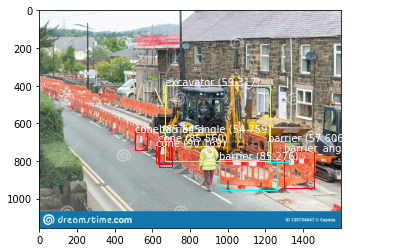

In [44]:
ytinyhat = site_od_detector.predict(image)
print(f'pred shape {ytinyhat.shape}')
draw_preds_bbs(photo_filename, ytinyhat, labels)

# Core mL Conversion

In [9]:
site_od_detector.inputs[0].shape

TensorShape([None, 448, 448, 3])

In [51]:
site_od_detector.outputs

[<KerasTensor: shape=(None, None, 16) dtype=float32 (created by layer 'tf.concat_16')>]

In [54]:
num_classes = len(labels)
total_len = 4 + num_classes
total_len

16

In [55]:
# decoder model

inputs = tf.keras.layers.Input(shape=(None, total_len), name='model_input')
slice_x0 = tf.keras.layers.Lambda( lambda x: x[..., 0], name = 'all_x0')(inputs)
slice_y0 = tf.keras.layers.Lambda(lambda x: x[..., 1], name = 'all_y0')(inputs)


slice_width = tf.keras.layers.Lambda(lambda x: x[..., 2], name = 'all_widths')(inputs)


slice_height = tf.keras.layers.Lambda( lambda x: x[..., 3], name = 'all_heights')(inputs)

# slice_height = tf.keras.layers.Subtract()([slice_y1, slice_y0])
# slice_width = tf.keras.layers.Subtract()([slice_x1, slice_x0])

# concatenate_x0_y0 = tf.keras.layers.Concatenate(axis = 0, name='concatenate_x0_y0')([slice_x0, slice_y0, slice_x1, slice_y1])
# transpose_dims = tf.keras.layers.Lambda(lambda x: tf.transpose(x), name ='all_boxes')(concatenate_x0_y0)

concatenate_x0_y0_x1_y1 = tf.keras.layers.Concatenate(axis = 0, name='concatenate_x0_y0_x1_y1')([slice_x0, slice_y0, slice_width, slice_height])
x_y_w_h = tf.keras.layers.Lambda(lambda x: tf.transpose(x), name ='x_y_w_h')(concatenate_x0_y0_x1_y1)
# normalized_x_y_w_h = tf.keras.layers.Lambda(lambda x: x/608.0, name ='normalized_x_y_w_h')(x_y_w_h)

slice_confidences = tf.keras.layers.Lambda(lambda x: x[..., 4:], name = 'slice_confidences')(inputs)
scores = tf.keras.layers.Lambda(lambda x: tf.squeeze(x, axis=0), name = 'all_scores')(slice_confidences)


decoder_model = tf.keras.Model(inputs = [inputs], outputs = [x_y_w_h, scores ], name = 'yolo_decoder')

In [56]:
decoder_model.summary()

Model: "yolo_decoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 model_input (InputLayer)       [(None, None, 16)]   0           []                               
                                                                                                  
 all_x0 (Lambda)                (None, None)         0           ['model_input[0][0]']            
                                                                                                  
 all_y0 (Lambda)                (None, None)         0           ['model_input[0][0]']            
                                                                                                  
 all_widths (Lambda)            (None, None)         0           ['model_input[0][0]']            
                                                                                       

In [57]:
decoder_model.inputs

[<KerasTensor: shape=(None, None, 16) dtype=float32 (created by layer 'model_input')>]

In [58]:
decoder_model.outputs

[<KerasTensor: shape=(None, None) dtype=float32 (created by layer 'x_y_w_h')>,
 <KerasTensor: shape=(None, 12) dtype=float32 (created by layer 'all_scores')>]

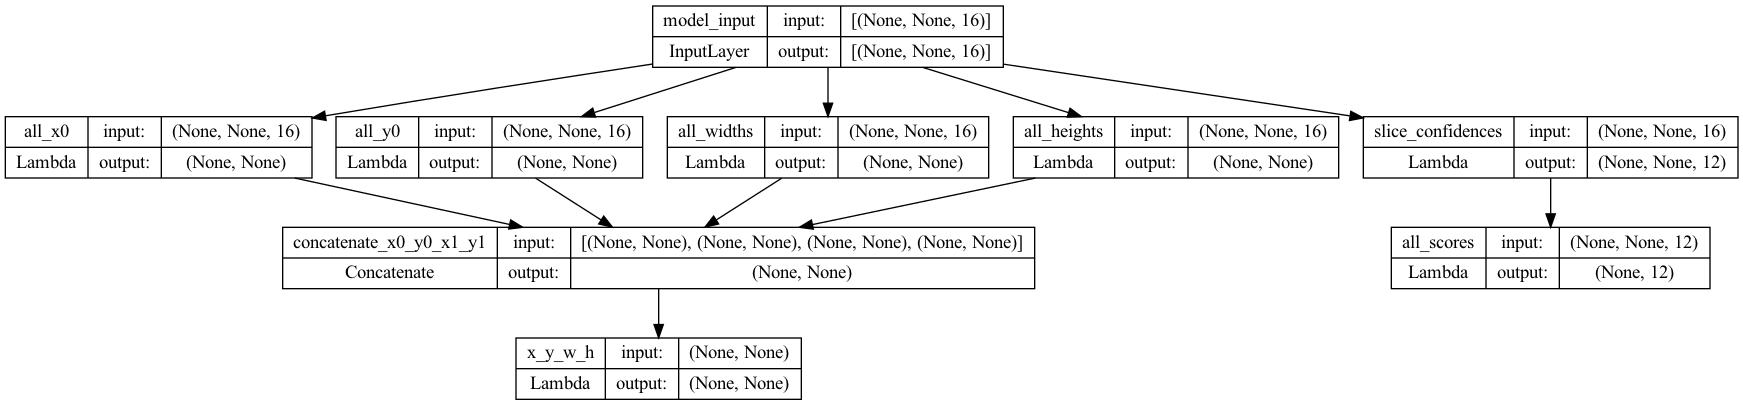

In [59]:
tf.keras.utils.plot_model(decoder_model, "decoder_model.png", show_shapes=True)

In [61]:
#combining model with decoder
yolo_tiny_model = site_od_detector
x = yolo_tiny_model.outputs[0]
x.shape
decoder_model.input.shape

inputs = tf.keras.layers.Input(shape=(448, 448, 3))
x = yolo_tiny_model(inputs)
predictions = decoder_model(x)
combined_model = tf.keras.Model(inputs=inputs, outputs=predictions)
combined_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 448, 448, 3)]     0         
                                                                 
 model (Functional)          (None, None, 16)          70745849  
                                                                 
 yolo_decoder (Functional)   [(None, None),            0         
                              (None, 12)]                        
                                                                 
Total params: 70,745,849
Trainable params: 70,670,841
Non-trainable params: 75,008
_________________________________________________________________


In [62]:
combined_model.save('od_yolo_decoded.h5')

# check predictions

In [63]:
import colorsys
import random

def generate_colors(class_names):
    hsv_tuples = [(x / len(class_names), 1., 1.) for x in range(len(class_names))]
    colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
    colors = list(map(lambda x: (int(x[0] ), int(x[1] ), int(x[2] )), colors))
    random.seed(10101)  # Fixed seed for consistent colors across runs.
    random.shuffle(colors)  # Shuffle colors to decorrelate adjacent classes.
    random.seed(None)  # Reset seed to default.
    return colors

In [65]:
from numpy import expand_dims
# from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
# from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array

# load and prepare an image
def load_image_pixels(filename, shape):
    # load the image to get its shape
    image = load_img(filename)
    width, height = image.size
    # load the image with the required size
    image = load_img(filename, interpolation = 'bilinear', target_size=shape)
    # convert to numpy array
    image = img_to_array(image)
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0

    # add a dimension so that we have one sample
    image = expand_dims(image, 0)
    
    return image, width, height

In [66]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle

def draw_preds_bbs(file_name, preds_pipeline, is_coreml = False):
    print(preds_pipeline[0].shape)
    print(preds_pipeline[1].shape)
    boxes = preds_pipeline[0]
    scores = preds_pipeline[1]
#     boxes = preds_pipeline[2]

    print('start drawing boxes')
    data = pyplot.imread(file_name)
    ax = pyplot.gca()
    colors = generate_colors(labels)
    for i in range(len(boxes)):
        index = i # nms_ids[i]
        box = boxes[index]
#         w_h_box = w_h_boxes[i]
        class_id = np.argmax(scores[i])
        score = scores[i][class_id]

#         y1, x1, y2, x2 = box[0], box[1], box[2], box[3]
#         width, height = x2 - x1, y2 - y1
        if is_coreml == False :
            x1, y1, height, width = box[0], box[1], box[2], box[3]
        else:
            x1, y1, width, height = box[0], box[1], box[2], box[3]
        
#         width, height = x2 - x1, y2 - y1
        
#         rect = Rectangle(
#             (x1 * image_w, y1 * image_h),
#             width * image_w,
#             height * image_h,
#             fill=False,
#             color=colors[class_id]
#         )
        x1, y1, width, height = box[0], box[1], box[2], box[3]
#         x1, y1, x2, y2 = box[0], box[1], box[2], box[3]
#         w_x1, w_y1, w_width, w_height = w_h_box[0], w_h_box[1], w_h_box[2], w_h_box[3]
        
        
        x1 = x1- width/2.0
        y1 = y1- height/2.0
        
#         width = x2-x1
#         height = y2-y1
        
#         print(f'-- n -- x0 = {x1}, y0 ={y1}, w = {width}, h ={height}')
#         print(f'-- w -- x0 = {w_x1}, y0 ={w_y1}, w = {w_width}, h ={w_height}')
#         width = w_width
#         height = w_height
        rect = Rectangle(
            (x1 * image_w, y1 * image_h),
            width * image_w,
            height * image_h,
            fill=False,
            color=colors[class_id]
        )
        ax.add_patch(rect)
        label = "%s (%.3f)" % (labels[class_id], score*100)
        pyplot.text(
            x1* image_w,
            y1* image_h,
            label, 
            color= 'white'
        )
    pyplot.imshow(data)
    pyplot.show()

In [67]:
# Pre-process the image
input_w, input_h = 448, 448
photo_filename = 'sample_test_images/3.jpeg'
# photo_filename = 'empty_image.jpg'
image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))
print("image initial size: ", image_w, image_h)
print("input image",image.shape)

image initial size:  1600 1155
input image (1, 448, 448, 3)


In [68]:
ytinyhat = combined_model.predict(image)

1/1 [==============================] - 23s 23s/step


In [69]:
ytinyhat

[array([[0.336786  , 0.5994741 , 0.04151848, 0.08748847],
        [0.33638218, 0.5970912 , 0.04291057, 0.08609764],
        [0.3365301 , 0.59680605, 0.04189708, 0.09501673],
        [0.34108222, 0.6002291 , 0.04407725, 0.09805708],
        [0.34296143, 0.596888  , 0.04909979, 0.08987554],
        [0.34334743, 0.59719455, 0.04817963, 0.10294546],
        [0.3372782 , 0.6071742 , 0.03842299, 0.07628654],
        [0.41900098, 0.63754255, 0.04280711, 0.1634522 ],
        [0.40813535, 0.6569201 , 0.04301067, 0.09375357],
        [0.40797073, 0.6544803 , 0.04168109, 0.0895062 ],
        [0.40820736, 0.6541616 , 0.03969602, 0.09959088],
        [0.41263762, 0.6556468 , 0.04419865, 0.10659225],
        [0.41452   , 0.6525809 , 0.04714295, 0.09511664],
        [0.41500136, 0.6528606 , 0.04580469, 0.10971448],
        [0.79571784, 0.6491027 , 0.07537732, 0.10021928],
        [0.4084122 , 0.6618705 , 0.04074021, 0.0773159 ],
        [0.40837878, 0.6613544 , 0.04114363, 0.07498133],
        [0.408

In [70]:
ytinyhat[1][0].shape

(12,)

# convert to Core ml

In [72]:
import coremltools as ct
from coremltools.models.neural_network import datatypes, NeuralNetworkBuilder

In [74]:
image_input = ct.ImageType(shape=(1,448, 448, 3), scale =1/255.0)

coreml_model = ct.convert('od_yolo_decoded.h5', inputs=[image_input], source= 'tensorflow', minimum_deployment_target=ct.target.iOS14)

2022-12-09 18:11:43.253493: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-12-09 18:12:09.940081: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
Running MIL Clean up passes: 100%|███████████| 9/9 [00:00<00:00, 17.39 passes/s]
Translating MIL ==> NeuralNetwork Ops: 100%|█| 1707/1707 [00:08<00:00, 213.34 op


In [75]:
print(coreml_model)

input {
  name: "input_2"
  type {
    imageType {
      width: 448
      height: 448
      colorSpace: RGB
    }
  }
}
output {
  name: "Identity"
  type {
    multiArrayType {
      dataType: FLOAT32
    }
  }
}
output {
  name: "Identity_1"
  type {
    multiArrayType {
      dataType: FLOAT32
    }
  }
}
metadata {
  userDefined {
    key: "com.github.apple.coremltools.source"
    value: "tensorflow==2.9.1"
  }
  userDefined {
    key: "com.github.apple.coremltools.version"
    value: "5.1.0"
  }
}



In [76]:
from PIL import Image
def load_local_and_scale_image(image_path, shape):
    image = Image.open(image_path)
    return image.resize(shape)

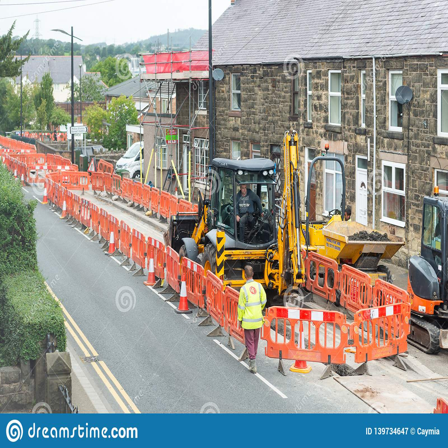

In [77]:
test_image = load_local_and_scale_image(photo_filename, (448, 448)) 
test_image

In [78]:
INPUT_NODE = coreml_model.get_spec().description.input[0].name
INPUT_NODE

'input_2'

In [79]:
preds_pipeline = coreml_model.predict(data={INPUT_NODE: test_image})

In [80]:
preds_pipeline

{'Identity_1': array([[1.24396873e-03, 1.17071653e-02, 1.92217878e-03, 8.84094555e-03,
         8.30501676e-01, 3.46281496e-03, 6.41963258e-03, 5.52214449e-03,
         2.79202196e-03, 4.22659097e-03, 6.90052519e-03, 4.08597896e-03],
        [1.27062229e-02, 2.02136040e-02, 1.02141015e-02, 6.46287296e-03,
         7.15002775e-01, 7.29279500e-03, 6.20267121e-03, 4.38128319e-03,
         5.74677205e-03, 6.08340232e-03, 7.39441393e-03, 4.39914828e-03],
        [1.20425308e-02, 2.52657235e-02, 5.09549910e-03, 6.20741863e-03,
         7.03603327e-01, 5.74464677e-03, 6.26497669e-03, 3.26211541e-03,
         5.06526558e-03, 6.32522674e-03, 5.53620188e-03, 4.76221088e-03],
        [4.21807356e-03, 3.66272926e-02, 4.52769408e-03, 1.56942159e-02,
         8.12517881e-01, 7.87727628e-03, 1.09541807e-02, 1.07048973e-02,
         2.88741733e-03, 6.20260555e-03, 1.73758697e-02, 8.36487580e-03],
        [3.17580551e-02, 1.06899656e-01, 1.74586345e-02, 7.49082025e-03,
         7.57569849e-01, 1.162410

(34, 4)
(34, 12)
start drawing boxes


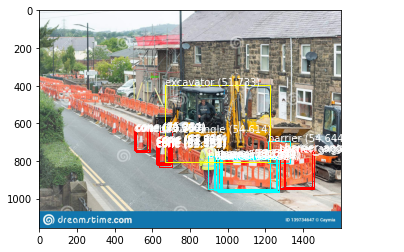

In [81]:
draw_preds_bbs(
    photo_filename, 
    [
        preds_pipeline['Identity'],
        preds_pipeline['Identity_1'],
        
    ],
    is_coreml=True
)

In [82]:
coreml_model.save('od_decoded_yolo_9thJune2022.mlmodel')

In [83]:
print(coreml_model)

input {
  name: "input_2"
  type {
    imageType {
      width: 448
      height: 448
      colorSpace: RGB
    }
  }
}
output {
  name: "Identity"
  type {
    multiArrayType {
      dataType: FLOAT32
    }
  }
}
output {
  name: "Identity_1"
  type {
    multiArrayType {
      dataType: FLOAT32
    }
  }
}
metadata {
  userDefined {
    key: "com.github.apple.coremltools.source"
    value: "tensorflow==2.9.1"
  }
  userDefined {
    key: "com.github.apple.coremltools.version"
    value: "5.1.0"
  }
}



# modify core ml

In [84]:
spec = coreml_model.get_spec()
spec.description

input {
  name: "input_2"
  type {
    imageType {
      width: 448
      height: 448
      colorSpace: RGB
    }
  }
}
output {
  name: "Identity"
  type {
    multiArrayType {
      dataType: FLOAT32
    }
  }
}
output {
  name: "Identity_1"
  type {
    multiArrayType {
      dataType: FLOAT32
    }
  }
}
metadata {
  userDefined {
    key: "com.github.apple.coremltools.source"
    value: "tensorflow==2.9.1"
  }
  userDefined {
    key: "com.github.apple.coremltools.version"
    value: "5.1.0"
  }
}

In [85]:
detector_builder = ct.models.neural_network.NeuralNetworkBuilder(spec= spec)

In [86]:
detector_builder.set_output(output_names=['Identity', 'Identity_1'], output_dims=[(0,4), (0,len(labels))] )

In [87]:
detector_builder.spec.description

input {
  name: "input_2"
  type {
    imageType {
      width: 448
      height: 448
      colorSpace: RGB
    }
  }
}
output {
  name: "Identity"
  type {
    multiArrayType {
      shape: 0
      shape: 4
      dataType: DOUBLE
    }
  }
}
output {
  name: "Identity_1"
  type {
    multiArrayType {
      shape: 0
      shape: 12
      dataType: DOUBLE
    }
  }
}
metadata {
  userDefined {
    key: "com.github.apple.coremltools.source"
    value: "tensorflow==2.9.1"
  }
  userDefined {
    key: "com.github.apple.coremltools.version"
    value: "5.1.0"
  }
}

In [88]:
output_sizes=[4, len(labels)]
for i in range(2):
    ma_type = detector_builder.spec.description.output[i].type.multiArrayType
    ma_type.shapeRange.sizeRanges.add()
    ma_type.shapeRange.sizeRanges[0].lowerBound = 0
    ma_type.shapeRange.sizeRanges[0].upperBound = -1
    ma_type.shapeRange.sizeRanges.add()
    ma_type.shapeRange.sizeRanges[1].lowerBound = output_sizes[i]
    ma_type.shapeRange.sizeRanges[1].upperBound = output_sizes[i]
    del ma_type.shape[:]

In [89]:
detector_builder.spec.description

input {
  name: "input_2"
  type {
    imageType {
      width: 448
      height: 448
      colorSpace: RGB
    }
  }
}
output {
  name: "Identity"
  type {
    multiArrayType {
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 4
          upperBound: 4
        }
      }
    }
  }
}
output {
  name: "Identity_1"
  type {
    multiArrayType {
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 12
          upperBound: 12
        }
      }
    }
  }
}
metadata {
  userDefined {
    key: "com.github.apple.coremltools.source"
    value: "tensorflow==2.9.1"
  }
  userDefined {
    key: "com.github.apple.coremltools.version"
    value: "5.1.0"
  }
}

In [90]:
yolo_coreml_model_modified = ct.models.MLModel(detector_builder.spec)

In [91]:
yolo_coreml_model_modified.save('od_decoder_yolo_coreml_model_modified.mlmodel')

# apply nms

In [92]:
from coremltools.models.neural_network import flexible_shape_utils

In [93]:
nms_spec = ct.proto.Model_pb2.Model()
nms_spec.specificationVersion = 3

In [94]:
nms = nms_spec.nonMaximumSuppression
nms.confidenceInputFeatureName = 'Identity_1'
nms.coordinatesInputFeatureName = 'Identity'
nms.confidenceOutputFeatureName = 'scores'
nms.coordinatesOutputFeatureName = 'boxes'
nms.iouThresholdInputFeatureName = 'iouThreshold'
nms.confidenceThresholdInputFeatureName = 'confidenceThreshold'

In [96]:
nms.iouThreshold = 0.5
nms.confidenceThreshold = 0.4
nms.pickTop.perClass = True

labels = np.loadtxt('data/classes/site_od_classes.txt', dtype=str, delimiter='\n')
nms.stringClassLabels.vector.extend(labels)

In [97]:
for i in range(2):
    decoder_output = yolo_coreml_model_modified._spec.description.output[i].SerializeToString()
    print(f"{i} -- decoder output is {decoder_output}")
    nms_spec.description.input.add()
    nms_spec.description.input[i].ParseFromString(decoder_output)

    nms_spec.description.output.add()
    nms_spec.description.output[i].ParseFromString(decoder_output)

nms_spec.description.output[1].name = 'scores'
nms_spec.description.output[0].name = 'boxes'

0 -- decoder output is b'\n\x08Identity\x1a\x1c*\x1a\x10\xc0\x80\x04\xfa\x01\x13\n\x0b\x10\xff\xff\xff\xff\xff\xff\xff\xff\xff\x01\n\x04\x08\x04\x10\x04'
1 -- decoder output is b'\n\nIdentity_1\x1a\x1c*\x1a\x10\xc0\x80\x04\xfa\x01\x13\n\x0b\x10\xff\xff\xff\xff\xff\xff\xff\xff\xff\x01\n\x04\x08\x0c\x10\x0c'


In [98]:
nms_spec.description

input {
  name: "Identity"
  type {
    multiArrayType {
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 4
          upperBound: 4
        }
      }
    }
  }
}
input {
  name: "Identity_1"
  type {
    multiArrayType {
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 12
          upperBound: 12
        }
      }
    }
  }
}
output {
  name: "boxes"
  type {
    multiArrayType {
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 4
          upperBound: 4
        }
      }
    }
  }
}
output {
  name: "scores"
  type {
    multiArrayType {
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 12
          upperBound: 12
        }
 

In [100]:
model_nms = ct.models.MLModel(nms_spec)
model_nms.save('od_yolo_nms.mlmodel')

# pipeline

In [101]:
input_features = [ (INPUT_NODE, datatypes.Array(1,1,1)), # Placeholder
                   ('iouThreshold', datatypes.Double()),
                   ('confidenceThreshold', datatypes.Double())
                 ]
output_features = [ 'scores', 'boxes' ]

In [102]:
pipeline = ct.models.pipeline.Pipeline(input_features, output_features)
pipeline.spec.specificationVersion = 3

pipeline.add_model(yolo_coreml_model_modified)
pipeline.add_model(model_nms)

# Update Pipeline description's inputs and outputs
pipeline.spec.description.input[0].ParseFromString(yolo_coreml_model_modified._spec.description.input[0].SerializeToString())
pipeline.spec.description.output[0].ParseFromString(model_nms._spec.description.output[1].SerializeToString())
pipeline.spec.description.output[1].ParseFromString(model_nms._spec.description.output[0].SerializeToString())

model_pipeline = ct.models.MLModel(pipeline.spec)

In [103]:
print(model_pipeline)

input {
  name: "input_2"
  type {
    imageType {
      width: 448
      height: 448
      colorSpace: RGB
    }
  }
}
input {
  name: "iouThreshold"
  type {
    doubleType {
    }
  }
}
input {
  name: "confidenceThreshold"
  type {
    doubleType {
    }
  }
}
output {
  name: "scores"
  type {
    multiArrayType {
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 12
          upperBound: 12
        }
      }
    }
  }
}
output {
  name: "boxes"
  type {
    multiArrayType {
      dataType: DOUBLE
      shapeRange {
        sizeRanges {
          upperBound: -1
        }
        sizeRanges {
          lowerBound: 4
          upperBound: 4
        }
      }
    }
  }
}



image initial size:  1600 1155
input image (1, 448, 448, 3)


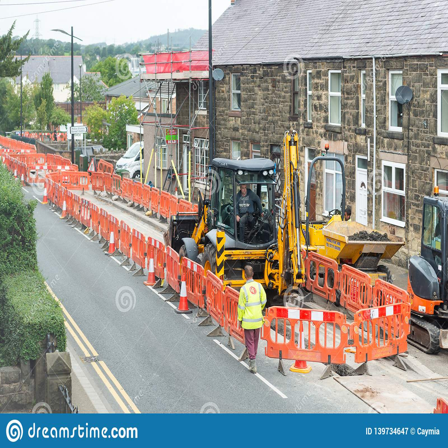

In [107]:
input_w, input_h = 448, 448
# photo_filename = '/Users/ankit/Desktop/test_image_samples/0.jpg'
# photo_filename = 'empty_image.jpg'
image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))
print("image initial size: ", image_w, image_h)
print("input image",image.shape)
test_image = load_local_and_scale_image(photo_filename, (448, 448)) 
test_image

In [108]:
preds_pipeline = model_pipeline.predict(data={INPUT_NODE: test_image, 'iouThreshold' : .45, 'confidenceThreshold' : .7})

(4, 4)
(4, 12)
start drawing boxes


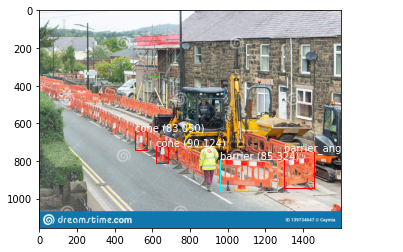

In [109]:
draw_preds_bbs(
    photo_filename, 
    [
        preds_pipeline['boxes'],
        preds_pipeline['scores'],
        
    ],
    is_coreml=True
)

In [110]:
model_pipeline.save('final_od__yolo_pipeline_9thDec2022.mlmodel')

In [111]:
quantized_model_pipeline = ct.models.neural_network.quantization_utils.quantize_weights(
    model_pipeline, 
    nbits=8, 
    quantization_mode='linear')

Quantizing using linear quantization
Optimizing Neural Network before Quantization:
Finished optimizing network. Quantizing neural network..
Quantizing layer model/model/batch_normalization/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/model/batch_normalization_1/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/model/batch_normalization_3/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/model/batch_normalization_2/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/model/batch_normalization_4/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/model/batch_normalization_5/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/model/batch_normalization_6/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/model/batch_normalization_7/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/model/batch_normalization_8/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/m

Quantizing layer model/model/batch_normalization_105/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/model/batch_normalization_101/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/model/batch_normalization_91/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/model/batch_normalization_106/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/model/batch_normalization_102/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/model/batch_normalization_92/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/model/conv2d_108/BiasAdd of type convolution
Quantizing layer model/model/batch_normalization_107/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/model/batch_normalization_103/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/model/batch_normalization_93/FusedBatchNormV3_nchw of type convolution
Quantizing layer model/model/conv2d_110/BiasAdd of type convolution
Quantizing l

In [112]:
quantized_model_pipeline.save('od_yolov4_tiny.mlmodel')

In [114]:
quantized_model_pipeline = ct.models.MLModel('od_yolov4_tiny.mlmodel')

In [115]:
INPUT_NODE = quantized_model_pipeline.get_spec().description.input[0].name
INPUT_NODE

'input_2'

In [116]:
preds_pipeline = quantized_model_pipeline.predict(data={INPUT_NODE: test_image})

(6, 4)
(6, 12)
start drawing boxes


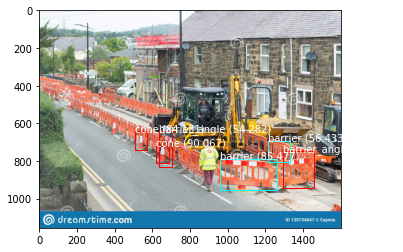

In [117]:
draw_preds_bbs(
    photo_filename, 
    [
        preds_pipeline['boxes'],
        preds_pipeline['scores'],
        
    ],
    is_coreml=True
)

In [118]:
quantized_model_pipeline.save('site_od_yolov4_tiny.mlmodel')